In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
     

In [6]:
df = pd.read_csv('personality_dataset.csv')

In [7]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [8]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [9]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [10]:
df.shape

(2900, 8)

In [11]:
df.count()


Time_spent_Alone             2837
Stage_fear                   2827
Social_event_attendance      2838
Going_outside                2834
Drained_after_socializing    2848
Friends_circle_size          2823
Post_frequency               2835
Personality                  2900
dtype: int64

In [12]:
df.Time_spent_Alone

0        4.0
1        9.0
2        9.0
3        0.0
4        3.0
        ... 
2895     3.0
2896     3.0
2897     4.0
2898    11.0
2899     3.0
Name: Time_spent_Alone, Length: 2900, dtype: float64

In [13]:
df.groupby("Stage_fear").sum()

,Time_spent_Alone,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Stage_fear,,,,,,,
No,2122.0,8936.0,6878.0,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,13550.0,8369.0,ExtrovertExtrovertExtrovertExtrovertExtrovertE...
Yes,10393.0,1999.0,1389.0,YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...,3645.0,1450.0,IntrovertIntrovertIntrovertIntrovertIntrovertI...


In [14]:
df.groupby("Stage_fear").count()

,Time_spent_Alone,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Stage_fear,,,,,,,
No,1384,1389,1383,1399,1379,1384,1417
Yes,1383,1378,1381,1377,1374,1379,1410


In [15]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [16]:

df_agg = df.groupby(["Time_spent_Alone", "Stage_fear"])["Going_outside"].mean().reset_index()

r_shape = df_agg.pivot(index="Time_spent_Alone", columns="Stage_fear", values="Going_outside")

     

In [17]:
print(r_shape)

Stage_fear              No       Yes
Time_spent_Alone                    
0.0               4.960000       NaN
1.0               4.983713       NaN
2.0               4.877907       NaN
3.0               5.026946       NaN
4.0               6.055556  0.939024
5.0                    NaN  1.052941
6.0                    NaN  0.992958
7.0                    NaN  1.021622
8.0                    NaN  0.890173
9.0                    NaN  1.045685
10.0                   NaN  1.005319
11.0                   NaN  1.133333


In [18]:
r_shape.head()

Stage_fear,No,Yes
Time_spent_Alone,,
0.0,4.960000,NaN
1.0,4.983713,NaN
2.0,4.877907,NaN
3.0,5.026946,NaN
4.0,6.055556,0.939024


In [19]:
r_shape.tail()

Stage_fear,No,Yes
Time_spent_Alone,,
7.0,NaN,1.021622
8.0,NaN,0.890173
9.0,NaN,1.045685
10.0,NaN,1.005319
11.0,NaN,1.133333


In [20]:
r_shape.count()

Stage_fear
No     5
Yes    8
dtype: int64

In [21]:

r_shape.shape

(12, 2)

In [22]:
r_shape.fillna(0,inplace=True)

In [23]:
r_shape.head()

Stage_fear,No,Yes
Time_spent_Alone,,
0.0,4.960000,0.000000
1.0,4.983713,0.000000
2.0,4.877907,0.000000
3.0,5.026946,0.000000
4.0,6.055556,0.939024


In [24]:
r_shape.isna().sum()

Stage_fear
No     0
Yes    0
dtype: int64

In [25]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>

In [26]:

print("\nNull values in dataset:")
print(df.isnull().sum())


Null values in dataset:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [27]:

for col in df.columns:
    print(f"{col} - Unique Values: {df[col].nunique()}")
     

Time_spent_Alone - Unique Values: 12
Stage_fear - Unique Values: 2
Social_event_attendance - Unique Values: 11
Going_outside - Unique Values: 8
Drained_after_socializing - Unique Values: 2
Friends_circle_size - Unique Values: 16
Post_frequency - Unique Values: 11
Personality - Unique Values: 2


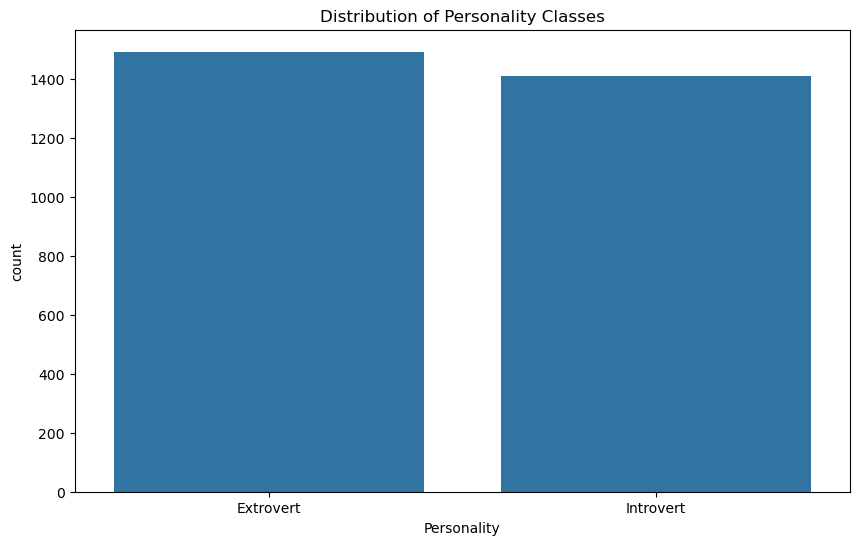

In [28]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Personality')
plt.title('Distribution of Personality Classes')
plt.show()

In [29]:


label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    

In [30]:


X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
     


Confusion Matrix:
[[275  27]
 [ 20 258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580


Accuracy: 0.92


In [37]:

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Read the correct uploaded file
df = pd.read_csv("personality_dataset.csv")

# Step 4: Clean and format (example — adjust based on actual structure)
print(df.head())  # Optional: See the first few rows

# If your file has a 'date' column and multiple tags:
# df.columns = ['date', 'tag', 'posts']
# df['date'] = pd.to_datetime(df['date'])

# # Step 5: Reshape the data
# reshaped_df = df.pivot_table(index='date', columns='tag', values='posts', aggfunc='sum')

# # Step 6: Apply rolling mean (6-month window)
# rolling_df = reshaped_df.rolling(window=6).mean()

# # Step 7: Plot
# plt.figure(figsize=(16, 10))
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Number of Posts", fontsize=14)
# plt.ylim(0, 35000)

# for column in rolling_df.columns:
#     plt.plot(rolling_df.index, rolling_df[column], linewidth=2.5, label=column)

# plt.legend(fontsize=14)
# plt.title("6-Month Rollidf = pd.read_csv("personality_dataset.csv")ng Average", fontsize=18)
# plt.grid(True)
# plt.show()

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [35]:
# Step 1: Read CSV directly (no upload needed)
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("personality_dataset.csv")

In [38]:

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Columns: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']


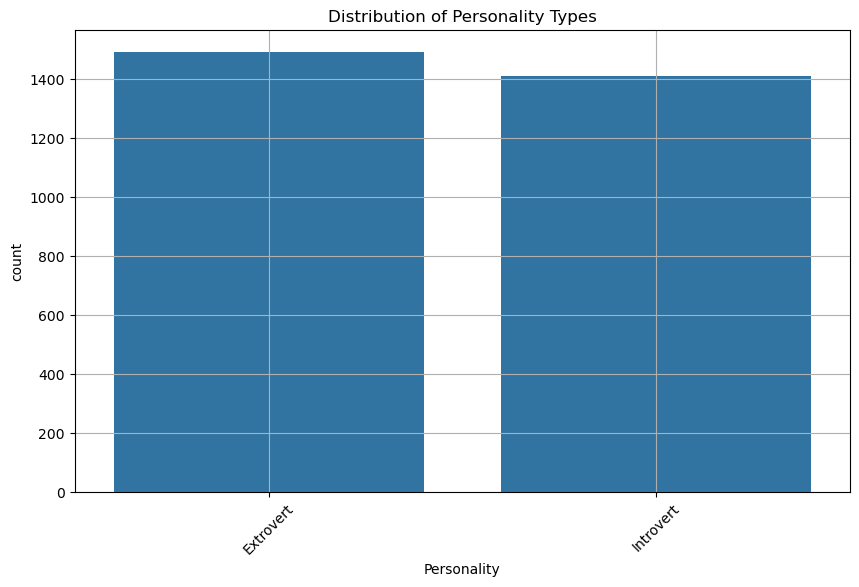

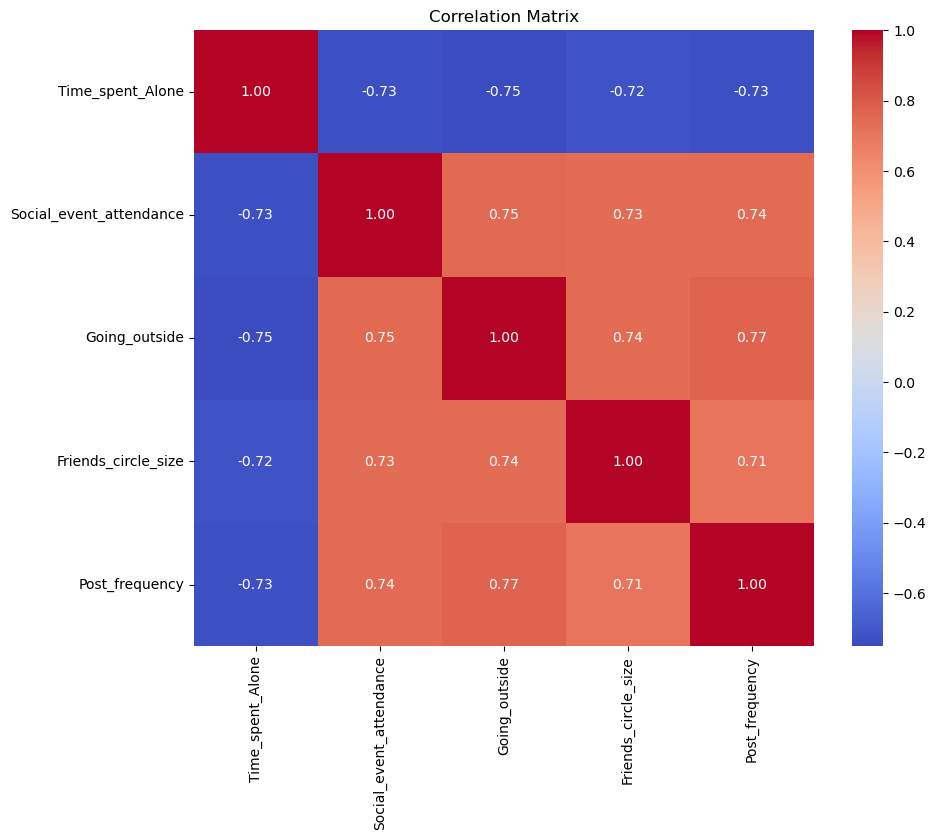

In [39]:
# Display available columns
print("Columns:", df.columns.tolist())

# Set possible column names for traits
traits = ['Openness', 'Neuroticism', 'Conscientiousness', 'Agreeableness', 'Extraversion']

# Filter for available traits
available_traits = [trait for trait in traits if trait in df.columns]

# Plot personality count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Personality')
plt.title('Distribution of Personality Types')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Boxplots for available traits
for trait in available_traits:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Personality', y=trait)
    plt.title(f'{trait} by Personality Type')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Pairplot if enough traits are available
if len(available_traits) >= 2:
    sns.pairplot(df[available_traits + ['Personality']], hue='Personality', height=2.5)
    plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include='number').columns.tolist()
if 'Personality' in numeric_cols:
    numeric_cols.remove('Personality')
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()